In [1]:
import pandas as pd

1. 데이터 불러오기

In [4]:
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(red.head())
print(white.tail())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

2. 타입 삽입

In [5]:
red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   

3. 데이터 셋 합치기

In [6]:
wine = pd.concat([red, white])
print(wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

4. 시각화

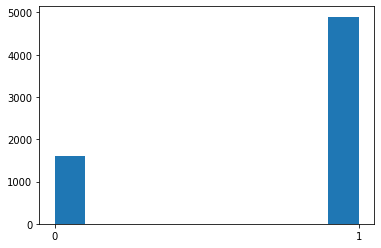

1    4898
0    1599
Name: type, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [10]:
import matplotlib.pyplot as plt 
plt.hist(wine['type']) 
plt.xticks([0,1]) 
plt.show()

print(wine['type'].value_counts())
print(wine.info())

5. 데이터 정규화

In [ ]:
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

6. 데이터 넘파이 변환

In [12]:
import numpy as np

In [14]:
wine_shuffle = wine_norm.sample(frac = 1)
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4357       0.173554          0.133333     0.204819        0.046012   0.051495   
1544       0.421488          0.033333     0.295181        0.006135   0.031561   
4637       0.181818          0.106667     0.246988        0.010736   0.044850   
217        0.165289          0.120000     0.144578        0.131902   0.058140   
557        0.975207          0.376667     0.295181        0.055215   0.142857   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
4357             0.170139              0.433180  0.078851  0.457364   
1544             0.017361              0.041475  0.105842  0.147287   
4637             0.142361              0.258065  0.059186  0.248062   
217              0.187500              0.336406  0.173318  0.457364   
557              0.031250              0.039171  0.309235  0.155039   

      sulphates   alcohol   quality  type  
4357   0.168539  0.521739  0.500000   1.0 

7. 훈련데이터와 테스트 데이터 생성

In [17]:
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes = 2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes = 2)
print(train_Y[0])
print(test_Y[0])

[0.17355372 0.13333333 0.20481928 0.04601227 0.05149502 0.17013889
 0.43317972 0.07885097 0.45736434 0.16853933 0.52173913 0.5       ]
1.0
[0.20661157 0.12666667 0.10843373 0.10889571 0.06478405 0.15277778
 0.41474654 0.17524581 0.39534884 0.14044944 0.14492754 0.33333333]
1.0
[0. 1.]
[0. 1.]


8. 모델 생성

In [20]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = 48, activation = 'relu', input_shape = (12,)),
                             tf.keras.layers.Dense(units = 24, activation = 'relu'),
                             tf.keras.layers.Dense(units = 12, activation = 'relu'),
                             tf.keras.layers.Dense(units = 2, activation='softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.07),
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 48)                624       
                                                                 
 dense_9 (Dense)             (None, 24)                1176      
                                                                 
 dense_10 (Dense)            (None, 12)                300       
                                                                 
 dense_11 (Dense)            (None, 2)                 26        
                                                                 
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(train_X, train_Y, epochs = 25, batch_size = 32, validation_split= 0.25)

Epoch 1/25


InvalidArgumentError: ignored